In [84]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
 df = pd.read_csv('C:/Users/hp/Documents/2021/ES-Doc/Data/Daily Sales ERPNext.csv')
# missing_values = ["n/a", "na", "--"] # Making a list of missing value types
# df = pd.read_csv("C:/Users/hp/Documents/2021/ES-Doc/Data/Daily Sales ERPNext.csv", na_values = missing_values) # Reading my dataframe to correct the missing values

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
df['Category'].unique()

array([nan, 'Stationary', 'Health', 'Home Cleaning', 'Alcoholic Drinks',
       'Beverages', 'Snacks', 'Condiments', 'Processed Foods',
       'Commodities', 'Baked Goods', 'Frozen', 'Dairy', 'Butchery',
       'Produce', 'Home Cook', 'Pet', 'Home maintenance', 'Seafood',
       'Festive/Seasonal', 'Others'], dtype=object)

In [87]:
df.describe()

,Stock Qty,Rate,Amount,Total Tax,Delivery Note
count,96961.000000,96961.000000,9.696100e+04,96961.000000,0.0
mean,2.378168,1776.278729,5.218044e+03,263.420740,NaN
std,7.060163,10927.863721,3.774809e+04,2208.618167,NaN
min,-23.000000,0.000000,-5.850000e+05,-25162.500000,NaN
25%,1.000000,0.000000,3.116300e+02,17.440000,NaN
50%,1.000000,52.500000,8.790700e+02,52.330000,NaN
75%,2.000000,394.000000,2.093020e+03,136.050000,NaN
max,300.000000,380000.000000,6.172279e+06,462920.930000,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96961 entries, 0 to 96960
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item Code           96961 non-null  object 
 1   Item Name           96961 non-null  object 
 2   Customer Name       96961 non-null  object 
 3   Item Group          96961 non-null  object 
 4   Description         96961 non-null  object 
 5   Invoice             96961 non-null  object 
 6   Posting Date        96961 non-null  object 
 7   Customer Group      96961 non-null  object 
 8   Customer            96961 non-null  object 
 9   Location            96961 non-null  object 
 10  Sales Channel       96897 non-null  object 
 11  Mode Of Payment     95428 non-null  object 
 12  Territory           96961 non-null  object 
 13  Receivable Account  96961 non-null  object 
 14  Company             96961 non-null  object 
 15  Sales Order         1548 non-null   object 
 16  Inco

In [89]:
df = df[df['Company'] =='WHITETREE RETAIL LIMITED']
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df = df[df['Posting Date'] == '2022-01-23']
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['hour'] = pd.to_datetime(df['Transaction Time'],format= '%H:%M:%S' ).dt.hour #Convert the string to time
df['Transaction Time'] = pd.to_datetime(df['Transaction Time'] ,format= '%H:%M:%S')
# df = df[df['division'] == 'Fresh']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 91890 to 92582
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Item Code           693 non-null    object        
 1   Item Name           693 non-null    object        
 2   Customer Name       693 non-null    object        
 3   Item Group          693 non-null    object        
 4   Description         693 non-null    object        
 5   Invoice             693 non-null    object        
 6   Posting Date        693 non-null    datetime64[ns]
 7   Customer Group      693 non-null    object        
 8   Customer            693 non-null    object        
 9   Location            693 non-null    object        
 10  Sales Channel       693 non-null    object        
 11  Mode Of Payment     693 non-null    object        
 12  Territory           693 non-null    object        
 13  Receivable Account  693 non-null    object  

In [91]:
df['month'] = df['Posting Date'].dt.month_name(locale='English')
df['day_week'] = df['Posting Date'].dt.day_name(locale='English')
df['year'] = df['Posting Date'].dt.strftime('%Y')
df['quarter'] = df['Posting Date'].dt.to_period('Q')
df['week'] = df['Posting Date'].dt.strftime('W' + '%W')
# df['Total'] = (pd.to_numeric(df['Total'], errors='coerce').fillna(0)) # Fill all the error cells in Total with Zero
#df['hour'] = df['Transaction Time'].dt.hour

In [92]:
# Create a cleaning function
def clean_text(x):
    
    #  x = x.replace('#','')
    #  x = x.replace(',','')
    #  x = x.replace(' ','')
    #  x = x.replace('-','')
     x = pd.to_numeric(x)
     return x
df['Total'] = df['Total'].apply(clean_text) # (This will manage the number formatted 'Total' column)

In [93]:
pd.options.display.max_columns = None
# pd.options.display.max_rows= None
df.head()

,Item Code,Item Name,Customer Name,Item Group,Description,Invoice,Posting Date,Customer Group,Customer,Location,Sales Channel,Mode Of Payment,Territory,Receivable Account,Company,Sales Order,Income Account,Cost Center,Stock Qty,Stock UOM,Rate,Amount,Total Tax,Total,Transaction Time,Delivery Note,Category,Division,Default Supplier,hour,month,day_week,year,quarter,week
91890,Pedigree Dog Food (Puppy) 400g,PEDIGREE DOG FOOD (PUPPY) 400G,Walkin,Petfood,PEDIGREE DOG FOOD (PUPPY) 400G,ACC-SINV-2022-06231,2022-01-23,All Customer Groups,Walkin,WTG IKOYI,Outlets,Cash,All Territories,Debtors - WRL,WHITETREE RETAIL LIMITED,NaN,Sales - WRL,1000 - WTG-HQ - WRL,6.0,Pieces,0.0,5386.05,403.95,5790.0,1900-01-01 15:56:46,NaN,Pet,Non food Grocery,FMCG SUPPLY SERVICES,15,January,Sunday,2022,2022Q1,W03
91891,DISPOSABLE CAKE STAND,DISPOSABLE CAKE STAND,Walkin,Festive/Seasonal,"WHITE PLASTIC CUTLERY SET, ---",ACC-SINV-2022-06130,2022-01-23,All Customer Groups,Walkin,WTG IKOYI,Outlets,WEMA POS,All Territories,Debtors - WRL,WHITETREE RETAIL LIMITED,NaN,Sales - WRL,1000 - WTG-HQ - WRL,1.0,Pieces,6000.0,7627.91,572.09,8200.0,1900-01-01 09:36:20,NaN,NaN,NaN,SIFT TRADING AND EVENT PLANNING,9,January,Sunday,2022,2022Q1,W03
91892,BIC FLAT HIGHLIGHTER GREEN BOX x 10,BIC FLAT HIGHLIGHTER GREEN BOX x 10,Walkin,Accessories,BIC FLAT HIGHLIGHTER GREEN BOX x 10,ACC-SINV-2022-06173,2022-01-23,All Customer Groups,Walkin,WTG IKOYI,Outlets,Cash,All Territories,Debtors - WRL,WHITETREE RETAIL LIMITED,NaN,Sales - WRL,1000 - WTG-HQ - WRL,1.0,Pieces,0.0,279.07,20.93,300.0,1900-01-01 13:02:27,NaN,Stationary,Non food Grocery,LUCKY STATIONARY NIG LTD,13,January,Sunday,2022,2022Q1,W03
91893,BIC VELLEDA 1701 LARGE CONICAL BLUE BOX x 12,BIC VELLEDA 1701 LARGE CONICAL BLUE BOX x 12,Walkin,Accessories,BIC VELLEDA 1701 LARGE CONICAL BLUE BOX x 12,ACC-SINV-2022-06173,2022-01-23,All Customer Groups,Walkin,WTG IKOYI,Outlets,Cash,All Territories,Debtors - WRL,WHITETREE RETAIL LIMITED,NaN,Sales - WRL,1000 - WTG-HQ - WRL,1.0,Pieces,0.0,186.05,13.95,200.0,1900-01-01 13:02:27,NaN,Stationary,Non food Grocery,LUCKY STATIONARY NIG LTD,13,January,Sunday,2022,2022Q1,W03
91894,BIC FLAT HIGHLIGHTER PINK BOX x 10,BIC FLAT HIGHLIGHTER PINK BOX x 10,Walkin,Accessories,BIC FLAT HIGHLIGHTER PINK BOX x 10,ACC-SINV-2022-06173,2022-01-23,All Customer Groups,Walkin,WTG IKOYI,Outlets,Cash,All Territories,Debtors - WRL,WHITETREE RETAIL LIMITED,NaN,Sales - WRL,1000 - WTG-HQ - WRL,1.0,Pieces,0.0,279.07,20.93,300.0,1900-01-01 13:02:27,NaN,Stationary,Non food Grocery,LUCKY STATIONARY NIG LTD,13,January,Sunday,2022,2022Q1,W03


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 91890 to 92582
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Item Code           693 non-null    object        
 1   Item Name           693 non-null    object        
 2   Customer Name       693 non-null    object        
 3   Item Group          693 non-null    object        
 4   Description         693 non-null    object        
 5   Invoice             693 non-null    object        
 6   Posting Date        693 non-null    datetime64[ns]
 7   Customer Group      693 non-null    object        
 8   Customer            693 non-null    object        
 9   Location            693 non-null    object        
 10  Sales Channel       693 non-null    object        
 11  Mode Of Payment     693 non-null    object        
 12  Territory           693 non-null    object        
 13  Receivable Account  693 non-null    object  

In [95]:
corr = df.corr()
corr

,Stock Qty,Rate,Amount,Total Tax,Total,Delivery Note,hour
Stock Qty,1.000000,-0.091200,0.353980,0.340172,0.353052,NaN,-0.029095
Rate,-0.091200,1.000000,0.261251,0.262295,0.261352,NaN,0.001711
Amount,0.353980,0.261251,1.000000,0.998313,0.999992,NaN,0.011501
Total Tax,0.340172,0.262295,0.998313,1.000000,0.998541,NaN,0.015962
Total,0.353052,0.261352,0.999992,0.998541,1.000000,NaN,0.011815
Delivery Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,-0.029095,0.001711,0.011501,0.015962,0.011815,NaN,1.000000


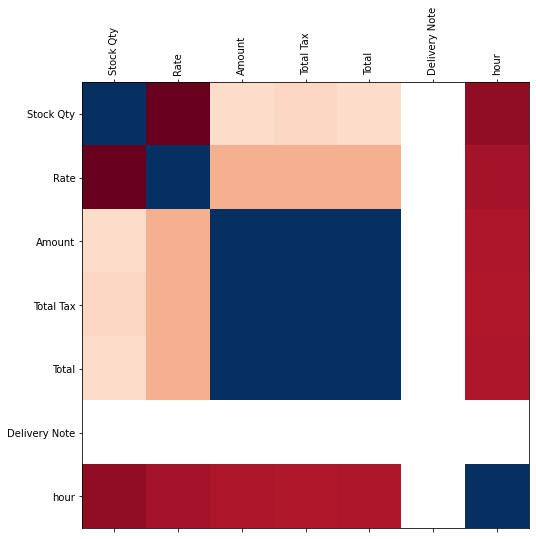

In [96]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [97]:
cat_sales = pd.DataFrame(df.groupby(['Item Group']).sum()['Total'])
(cat_sales.sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')) #https://pbpython.com/styling-pandas.html

,Total
Item Group,
Fruit Juices,"₦ 85,750.00"
Wine,"₦ 59,885.00"
Fruits,"₦ 59,724.00"
Yoghurts,"₦ 45,649.92"
Beers & Ciders,"₦ 40,375.00"
Milk based drinks,"₦ 39,870.00"
Personal Care,"₦ 39,445.00"
Chocolates,"₦ 37,155.00"
Ice Cream,"₦ 35,810.00"


In [98]:
cat_sales = pd.DataFrame(df.groupby('hour').sum()['Total']).style.format('₦ {0:,.2f}')
cat_sales

,Total
hour,
9,"₦ 32,837.00"
10,"₦ 60,406.50"
11,"₦ 105,416.22"
12,"₦ 42,815.00"
13,"₦ 59,144.80"
14,"₦ 96,723.70"
15,"₦ 156,844.00"
16,"₦ 119,657.39"
17,"₦ 166,816.50"


In [99]:
cat_sales = pd.DataFrame(df.groupby('Posting Date').sum()['Total']).style.format('₦ {0:,.2f}')
cat_sales

,Total
Posting Date,
2022-01-23 00:00:00,"₦ 1,092,573.47"


In [100]:
cat_sales = pd.DataFrame(df.groupby(['Posting Date', 'Category', 'Item Code']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')

In [101]:
# cat_sales.query("category == 'Snacks' & item_code =='JACOB CREAM CRACKERS 300G' ").sort_values(['total'],ascending= False)[:20]
cat_sales.query("Category == 'Snacks' | Category == 'Alcoholic Drinks' ").sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')

In [102]:

cat_sales = pd.DataFrame(df.groupby(['Posting Date', 'Item Code']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')

In [103]:
df['Division'].unique()

array(['Non food Grocery', nan, 'Grocery', 'Fresh'], dtype=object)

In [104]:
cat_sales = pd.DataFrame(df.groupby(['Division', 'Category', 'Item Group']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False).style.format('₦ {0:,.2f}')

In [105]:
#Top 20 of the item sold
cat_sales = pd.DataFrame(df.groupby(['Division', 'Category', 'Item Group','Item Code']).sum()['Stock Qty'])
cat_sales.sort_values(['Stock Qty'],ascending= False)[:20]

Stock Qty
Division Category         Item Group        Item Code                                             
Grocery  Beverages        Water             EVA WATER 75CL                                    95.0
                          Fruit Juices      CAPRISUN ORANGE 99P 330ML 1X15                    52.0
                          Malts             Maltina Vanilla CanX24                            48.0
         Alcoholic Drinks Beers & Ciders    Heineken Sleek Can                                31.0
Fresh    Baked Goods      Bread             FAMILY LOAF BREAD                                 25.0
Grocery  Beverages        Fruit Juices      5ALIVE 30CL PULPY JUICE                           24.0
                          Carbonated Drinks 33CL COKE ZERO                                    24.0
                                            TEEM SODA 33CL                                    24.0
         Snacks           Biscuits          COASTER BISCUITS                                  22.0
         Beverages        Carbonated Drinks 50CL COKE                                         21.0
         Alcoholic Drinks Beers & Ciders    Heineken Bottle X12                               21.0
Fresh    Baked Goods      Pastries          MEAT PIE                                          20.0
Grocery  Beverages        Water             LASENA TABLE WATER 50CL                           20.0
Fresh    Baked Goods      Pastries          EGGROLL                                           18.0
         Dairy            Milk              EMBORG FULL CREAM MILK UHT 3.5% FAT (12*1L)       17.0
Grocery  Snacks           Biscuits          NOREOS CHOCOLATE BISCUITS 30G  X48                16.0
         Beverages        Fruit Juices      5ALIVE PULPY LEMON 30CL                           15.0
         Snacks           Snacks            Pringles Original 19g                             14.0
                                            Welch�s Fruit Snacks 22.7g                        13.0
         Beverages        Carbonated Drinks PEPSI LITE� 500ML                                 12.0

In [106]:
cat_sales = pd.DataFrame(df.groupby(['Category', 'Item Code']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')

In [107]:
cat_sales.query("Category == 'Dairy'").sort_values(['Total'],ascending= False)[:20].style.format('₦ {0:,.2f}')

In [108]:
cat_sales = pd.DataFrame(df.groupby(['Posting Date', 'Category']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False).style.format('₦ {0:,.2f}')

In [109]:
cat_sales = pd.DataFrame(df.groupby(['Category']).sum()['Total'])
cat_sales.sort_values(['Total'],ascending= False).style.format('₦ {0:,.2f}')

,Total
Category,
Beverages,"₦ 217,255.00"
Alcoholic Drinks,"₦ 122,800.00"
Dairy,"₦ 103,254.92"
Frozen,"₦ 102,455.40"
Snacks,"₦ 96,290.00"
Produce,"₦ 85,176.65"
Health,"₦ 76,200.00"
Condiments,"₦ 58,380.00"
Baked Goods,"₦ 53,300.00"


Text(0.5, 1.0, 'Sales by Category')

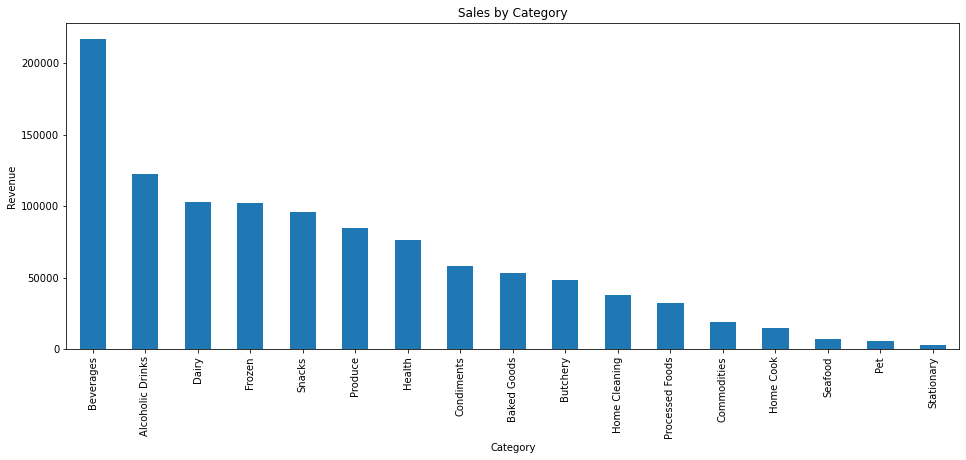

In [110]:
plt.figure(figsize = (16,6))
cat_sales.groupby('Category').sum().Total.sort_values(ascending= False).plot(kind ='bar')
plt.ylabel('Revenue')
plt.title('Sales by Category')

In [135]:
df.columns

Index(['Item Code', 'Item Name', 'Customer Name', 'Item Group', 'Description',
       'Invoice', 'Posting Date', 'Customer Group', 'Customer', 'Location',
       'Sales Channel', 'Mode Of Payment', 'Territory', 'Receivable Account',
       'Company', 'Sales Order', 'Income Account', 'Cost Center', 'Stock Qty',
       'Stock UOM', 'Rate', 'Amount', 'Total Tax', 'Total', 'Transaction Time',
       'Delivery Note', 'Category', 'Division', 'Default Supplier', 'hour',
       'month', 'day_week', 'year', 'quarter', 'week'],
      dtype='object')